# Problem Sheet 6

## Problem 1: Cross-validation methods provided by Scikit-Learn

We want to experiment with the methods `sklearn` provides to us.

**Task**: For this we generate a *toy* dataset containing only the numbers from 0 to 9, i.e.,

    X = range(10)



**Solution**:

In [5]:
X = list(range(10))

In [6]:
X?

### Leave One Out Cross-Validation

The function `LeaveOneOut` is a simple cross-validation.
Each training set is created by taking all the samples except one, the test set consisting of the single remaining sample.
Thus, for `n` samples, we have `n` different training sets and `n` different test sets.
Leave-one-out cross-validation (LOOCV) can be computationally expensive for large datasets.

You can import the function `LeaveOneOut` by

    from sklearn.model_selection import LeaveOneOut
    
The documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut).

With

    loo = LeaveOneOut()
    
you generate a so-called *iterator* in python.
An iterator is an object that can be iterated upon, meaning that you can traverse through all its values.

The command

    S = loo.split(X)

generates a leave-one-out cross-validation iterator `S` across the set/list/array `X`.

**Task**: Execute the above commands.

**Solution**:

In [7]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
S = loo.split(X)

In general, you can always access the next item in the iterator `S` by typing

    next(S)
    
**Task**: Try this out multiple times and see what changes.

**Solution**:

In [10]:
next(S)

(array([0, 1, 3, 4, 5, 6, 7, 8, 9]), array([2]))

In general, iterators are used in loops:

    for train, test in loo.split(X):
        print("Training set: %s\t Test set: %s" % (train, test))

**Task**: Try it!

**Solution**:

In [11]:
for train, test in loo.split(X):
    print("Training set: %s\t Test set: %s" % (train, test))

Training set: [1 2 3 4 5 6 7 8 9]	 Test set: [0]
Training set: [0 2 3 4 5 6 7 8 9]	 Test set: [1]
Training set: [0 1 3 4 5 6 7 8 9]	 Test set: [2]
Training set: [0 1 2 4 5 6 7 8 9]	 Test set: [3]
Training set: [0 1 2 3 5 6 7 8 9]	 Test set: [4]
Training set: [0 1 2 3 4 6 7 8 9]	 Test set: [5]
Training set: [0 1 2 3 4 5 7 8 9]	 Test set: [6]
Training set: [0 1 2 3 4 5 6 8 9]	 Test set: [7]
Training set: [0 1 2 3 4 5 6 7 9]	 Test set: [8]
Training set: [0 1 2 3 4 5 6 7 8]	 Test set: [9]


In [21]:
X = list(X)

In [25]:
X[train[0]]

10

## K-Fold cross validation

The function `KFold` divides all the samples into `k` groups of samples called folds (if $k=n$, this is equivalent to the Leave-One-Out strategy) of equal sizes (if possible).
The prediction function is learned using `k−1` folds, and the omitted fold is used for testing.

You can import the function `KFold` by

    from sklearn.model_selection import KFold

Check out the documentation of the function [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).
As for LOOCV, create a test example that shows the behaviour of the function.
For `n_splits=2`, you should obtain

    Training set: [5 6 7 8 9]	 Test set: [0 1 2 3 4]
    Training set: [0 1 2 3 4]	 Test set: [5 6 7 8 9]

**Solution**:

In [12]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("Training set: %s\t Test set: %s" % (train, test))

Training set: [5 6 7 8 9]	 Test set: [0 1 2 3 4]
Training set: [0 1 2 3 4]	 Test set: [5 6 7 8 9]


## Problem 2 - Cross-validation for a diabetes data set

The diabetes data set contains ten measurements (age, sex, body mass index, average blood pressure, and six blood serum measurements) for each of the `n = 442` patients.

The response variable is a quantitative measure of disease progression one year after baseline.

**Task**: The data set is part of scikit learn, you can import it using

    from sklearn import datasets
    diabetes = datasets.load_diabetes()

**Solution**:

In [13]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

Next, we create a pandas data frame to hold this information.

**Task**:
Create a pandas data frame `X` holding the ten predictor variables. You should name the columns in the data frame using the optional argument `columns=cols`, where `cols` is given by
    
    cols = ["age", "sex", "bmi", "map", "tc",
            "ldl", "hdl", "tch", "ltg", "glu"]
            
Store the response variables as an numpy array `y`

**Hint**:
As in the iris data set, the diabetes dataset is as a python dictionary. The predictor variables can be accessed by `diabetes.data`, the responses via `diabetes.target`.

**Solution**:

In [14]:
import pandas as pd

cols = ["age", "sex", "bmi", "map", "tc",
        "ldl", "hdl", "tch", "ltg", "glu"]
X = pd.DataFrame(diabetes.data, columns=cols)
y = diabetes.target

We want to try two different estimation approaches here.
1. At first, we use a plain training set/validation set approach, where we exclude $1/5$ of the data from training.
2. Our second approach is to estimate $5$ different models using 5-fold cross-validation

### 1st approach: Simple splitting into training and validation set

In this part, we want to train a linear model using a subset of our samples.
We have done this by hand so far, but there are also methods provided by `sklearn` which will do this work for us.
Use the function `train_test_split` from the module `sklearn.model_selection` to divide your data inta a training and a validation set. SInce this selection is made randomly, you should set the optional input `random_state` to fix the seed of the random number generator to ensure comparability, e.g., by setting `random_state = 1`.

**Task**: Split your data into a training and a validation set using the function `train_test_split`.
Your validation set should contain 20\% of the data.

**Solution**:

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


**Task**: Check the size of your sets. The training set should contain 353 samples, while the test set contains 89.

**Solution**:

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


**Task**:
Fit a linear regression model to your **training** data. Use the appropriate method in `sklearn`.

**Solution**:

In [17]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
test_model = lm.fit(X_train, y_train)

**Task**: Use your model to predict the response on the validation set.

**Solution**:

In [18]:
test_pred = test_model.predict(X_test)

Until now, our plots were always of the type predictor against response or against regression line.
Another way to display the quality of a regression fit is to plot the true values against the predicted values.
The closer the values are to the identity $f(x) = x$, the better the fit.

**Task**:
Produce a scatterplot of the true values in the validation response against the predicted values. Label the axes.

**Solution**:

<IPython.core.display.Javascript object>


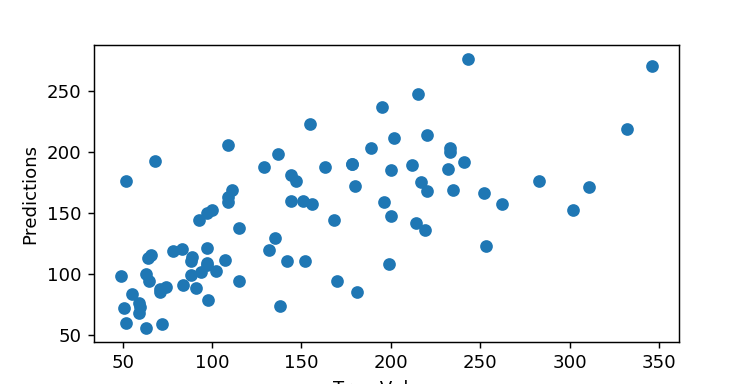

Text(0, 0.5, 'Predictions')

In [20]:
from matplotlib import pyplot as plt
%matplotlib notebook
plt.scatter(y_test, test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

**Task**: Compute the mean squared error $\text{MSE}_\text{val}$ on the validation set.
You can either use the method `mean_squared_error` from the module `sklearn.metrics`, or you can implement it by yourself.

**Solution**:

In [13]:
### Method 1:
#import numpy as np
#def mse (x,y): return np.power(y_test - test_pred,2).mean()
#mse_test = mse(y_test, test_pred)

### Method 2:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, test_pred)

print('MSE for whole validation set: ', mse_test)

MSE for whole validation set:  2992.5576814529445


**Task**: What is the proportion of variability that is explained by this linear fit. *Remember*: A `LinearRegression` has a method that computes exactly this.

In [14]:
print("R^2 score:", lm.score(X_test, y_test))

R^2 score: 0.43843604017332694


### 2nd approach: Use K-Fold Cross-Validation

Next, we want to use cross-validation to select our model.
Scikit-learn is a powerful library and possesses numerous modules and functions.
Here, we explore the function `cross_val_score`, which can be imported by

    from sklearn.model_selection import cross_val_score
    
This function performs K-fold cross-validation and returns a score for each fold (this is the $R^2$-score by default).
    
**Task**: Please read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) and import the function `cross_val_score`.

**Solution**:

In [21]:
from sklearn.model_selection import cross_val_score

The functions expects as a first argument an `estimator`.
We are informed by the documentation that this should be an "estimator object implementing ‘fit’". This is fulfilled by all estimation methods used so far (e.g. linear models, logistic regression, LDA).
In the case of a linear regression fit, this could be
    
    model = linear_model.LinearRegression()

**Task**: Perform a 5-fold cross-validation for a linear model on the diabetes data set and print the scores.

**Solution**:

In [22]:
n_fold = 5
model = linear_model.LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=n_fold)
print(cv_scores.mean())

0.48231812211149394


Use the function `cross_val_predict` in the module `sklearn.model_selection` to make prediction on the diabetes data set.

**Solution**:

In [23]:
from sklearn.model_selection import cross_val_predict
cv_pred = cross_val_predict(model, X, y, cv=n_fold)

**Task**: Make a scatterplot of the true values in the test response against the predicted values. Label the axes.

**Solution**:

<IPython.core.display.Javascript object>


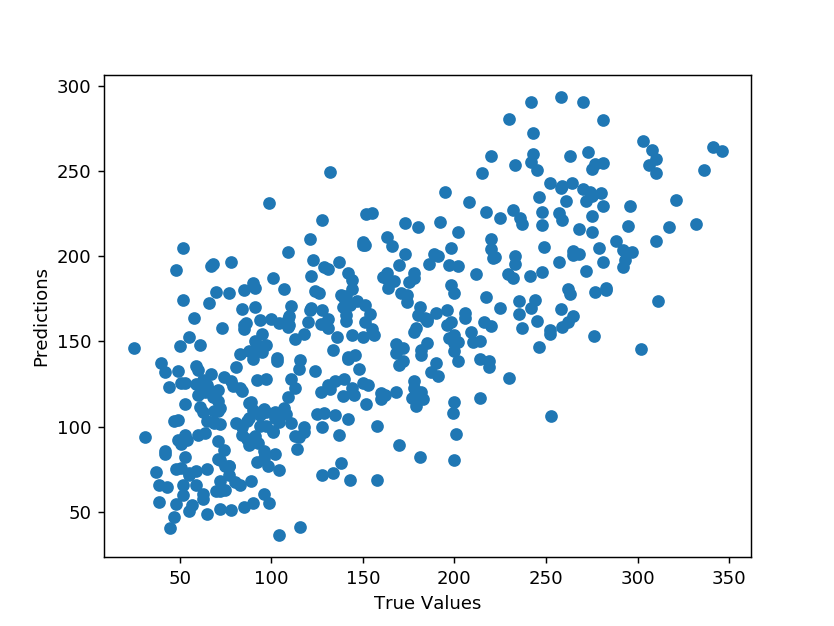

Text(0, 0.5, 'Predictions')

In [24]:
# Make cross-validated predictions
predictions = cross_val_predict(model, X, y, cv=n_fold)
plt.scatter(y, cv_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

**Task**: Compute the $R^2$-score this model. You can use the function `r2_score` from the module `sklearn.metrics`.

**Solution**:

In [25]:
from sklearn.metrics import r2_score
accuracy = r2_score(y, cv_pred)
print("Cross-validated Accuracy:", accuracy)

Cross-validated Accuracy: 0.49532382463572844


**Caution**: Altough this $R^2$-score is higher than the score for the training/validation set split, they are not really comparable since we computed them on different subsets of the data.
To get a more reliable comparison, we must keep part of the data as a so-called *hold-out* data set to be used for estimating the true learning error.